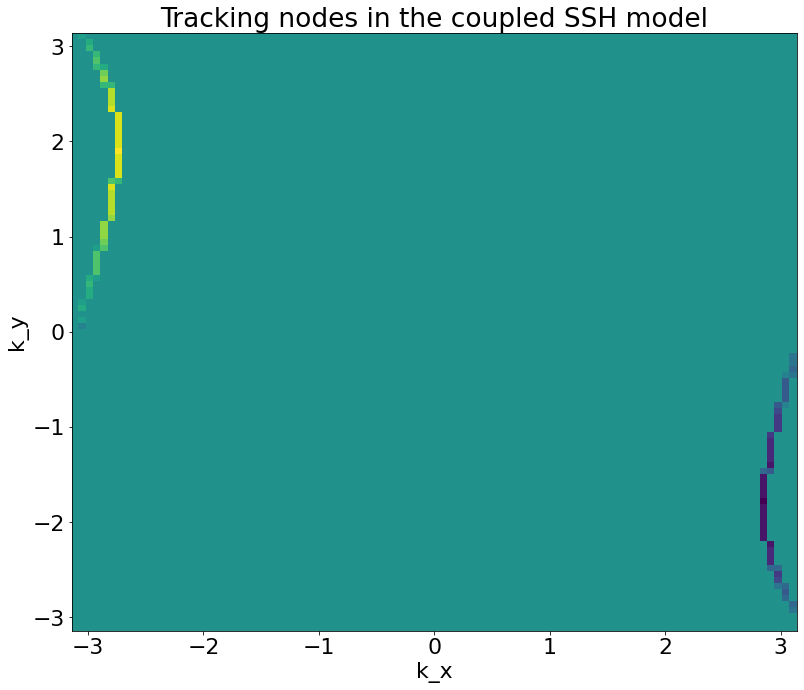

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import excitingmixing
from math import exp
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import clear_output
from pylab import rcParams
rcParams['figure.figsize'] = 13, 11
rcParams.update({'font.size': 22})

'''
Program to track Weyl nodes in the coupled SSH chain model in 2D. Inversion symmetry guarantees that k, -k pairs of nodes have opposite
chiral charge
'''

pi=np.pi
res=100 #resolution in one direction, number of pixel is res**2

ks = np.linspace(-pi, pi, res)
ky, kx = np.meshgrid(ks,ks)
eiky = np.exp(1.j*ky)
eikx = np.exp(1.j*kx)

v  = 1.
wy = 1./3.
wx_no = 300
Q = np.zeros([res, res]) #total charge of the pixel, i.e. summed over tuning wx

def k(n):
    return(2*pi/res*n -pi)

for wx in np.linspace(v-wy-0.1, v+wy-0, wx_no):
    h   =  v + wx*eikx + wy*eiky
    hx  = np.roll(h, 1, axis=0)
    hy  = np.roll(h, 1, axis=1)
    hxy = np.roll(np.roll(h, 1, axis=1), 1, axis=0)
    
    Q += (np.angle(h/hx) + np.angle(hx/hxy)  \
        + np.angle(hxy/hy) + np.angle(hy/h)) /2/pi #charge of pixels for a given wx value

#summation is used to be able to track the whole evolution of the Weyl nodes
    
plt.pcolormesh(ks, ks, Q.T)
plt.xlabel("k_x")
plt.ylabel("k_y")
plt.title("Tracking nodes in the coupled SSH model")
plt.savefig("coupledssh-node-00", dpi = 250)
plt.show()


#for node in range(wx_no):
#    plt.scatter(k(nodes[node][0]), k(nodes[node][1]), color='red')
